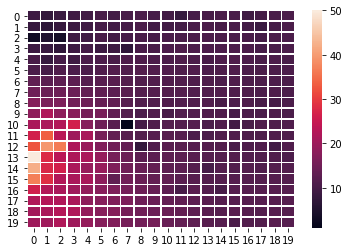

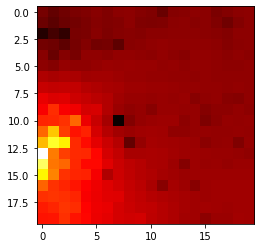

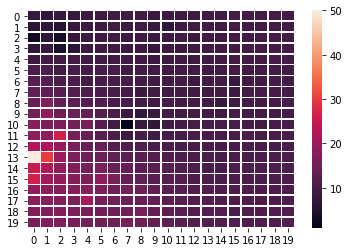

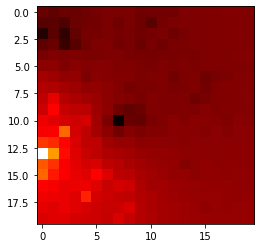

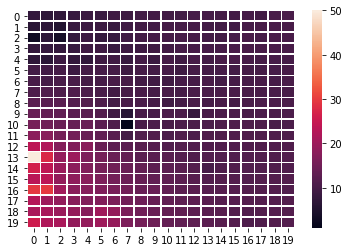

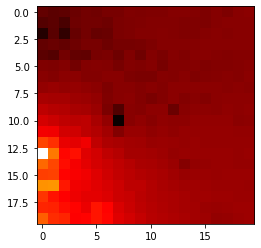

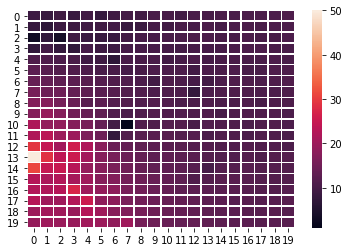

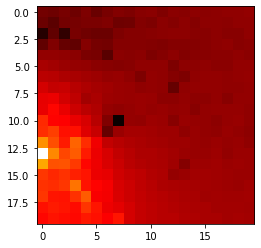

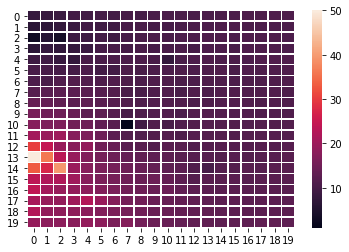

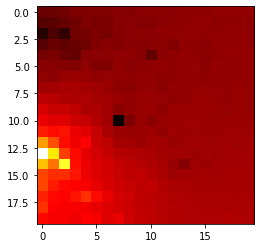

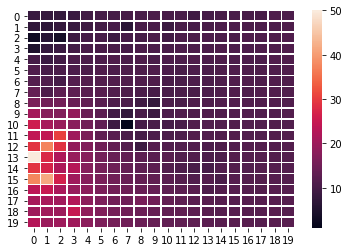

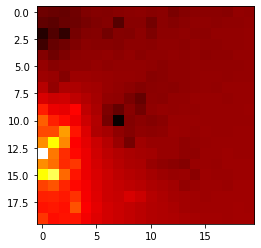

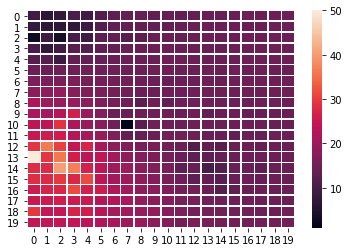

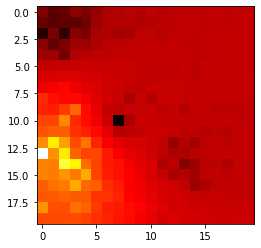

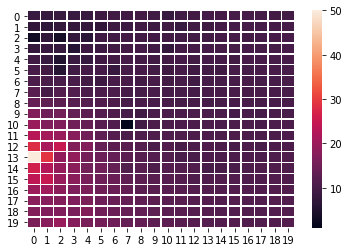

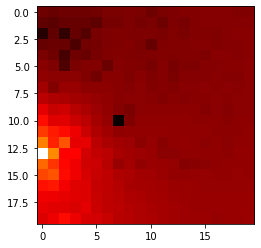

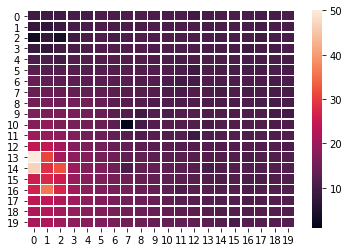

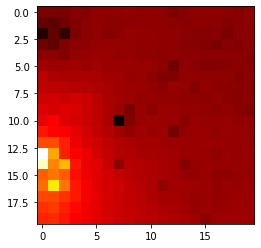

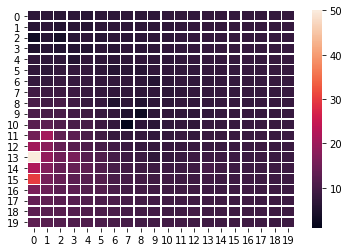

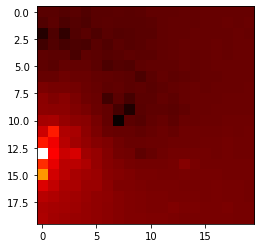

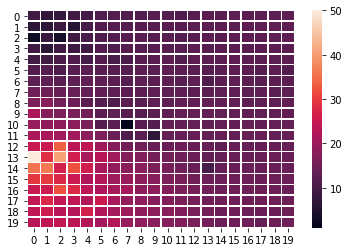

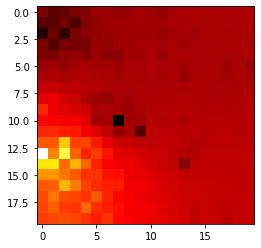

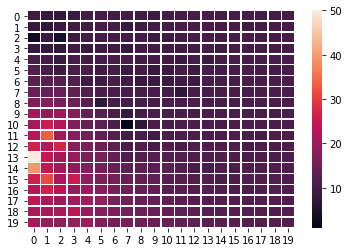

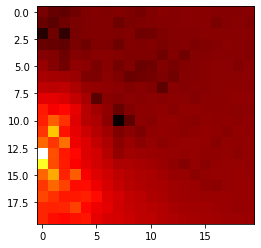

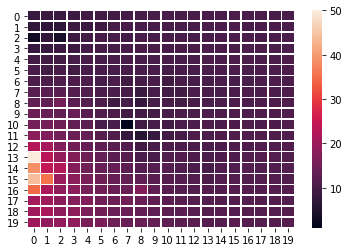

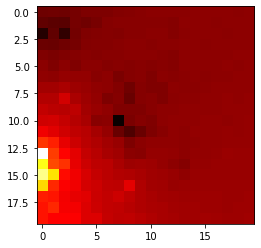

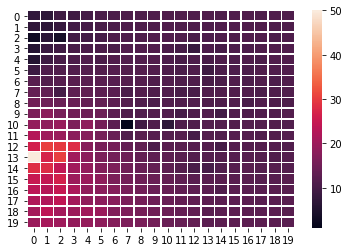

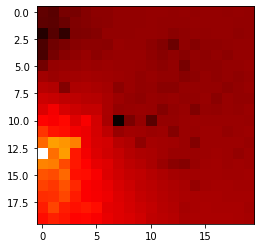

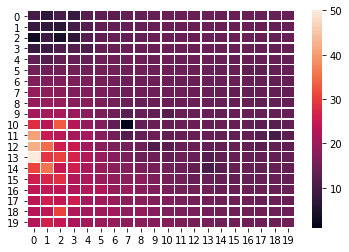

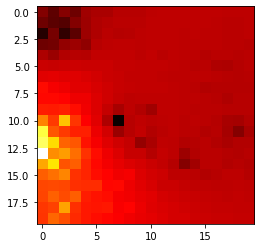

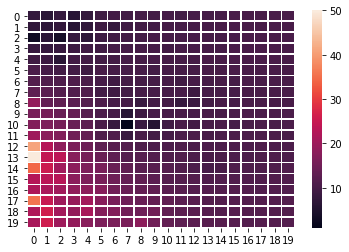

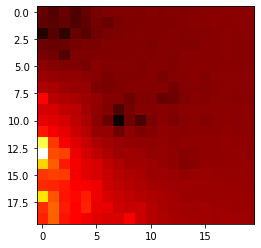

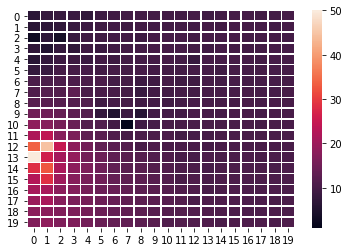

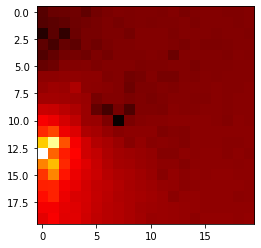

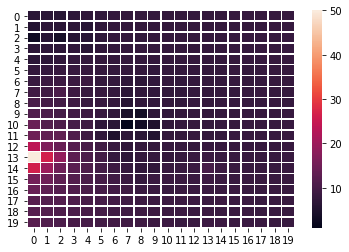

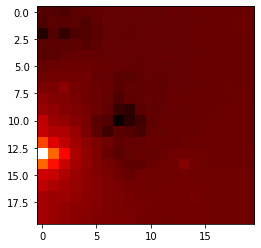

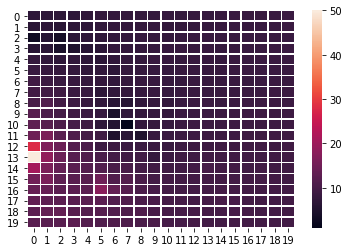

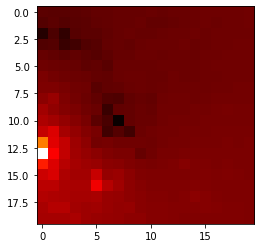

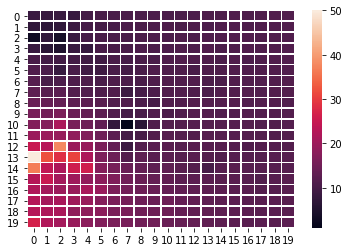

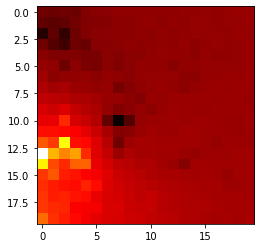

In [27]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

def SequentialGaussianSimulation(dados,blocos,p):
    resultado = np.zeros(blocos)
    dados = np.array(dados) # Sao os dados inciais da matriz
    w = blocos[0] * blocos[1] # w eh o numero de elementos da matriz
    v = [] # Vetor no qual sera sorteada a ordem de preenchimento da matriz
    m = blocos[0] # m eh o numero de linhas
    n = blocos[1] # n eh o numero de colunas

    # V sera preenchido e permutado
    for i in range (w):
      v.append(i)
    rd.shuffle(v)

    # interpolacao de Sherpard
    for i in range (w):
      x = int(v[i]/m)
      if v[i] == 0:
        y = 0 
      else:
        y = int(v[i]%n)

      dist = np.sqrt((x-dados[:, 0])**2+(y-dados[:, 1])**2)

      if 0 in dist:
        ind = np.where(dist == 0)
        resultado[x,y] = dados[ind[0][0],2]
      else:
        resultado[x,y] = np.sum((1/dist**p)*dados[:,2])/np.sum(1/dist**p)

      dados = np.append(dados,[[x,y,resultado[x,y]]],axis = 0)

    return resultado

def SGSNsamples(nsamples, dados, blocos, p):
    x = np.zeros(nsamples, dtype=object)
    for i in range(nsamples):
        x[i] = SequentialGaussianSimulation(dados,blocos,p)
    return x


dados = [[1,1,7],[2,0,3],[2,2,4],[14,13,10],[13,0,50],[10,7,1]]
blocos = (20,20)
#x = SequentialGaussianSimulation(dados,blocos,2)

#print(x)
nsamples = 20
x = SGSNsamples(nsamples, dados, blocos, 2)

for i in range(nsamples):
    ax = sns.heatmap(x[i], linewidth=0.5)    
    plt.show()
    plt.imshow(x[i], cmap='hot', interpolation='nearest')
    plt.show()

